In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [25]:
train=pd.read_csv(r'C:\Users\vivek\Desktop\ml\train.csv')
test=pd.read_csv(r'C:\Users\vivek\Desktop\ml\test.csv')

In [26]:
train.shape,test.shape

((891, 12), (418, 11))

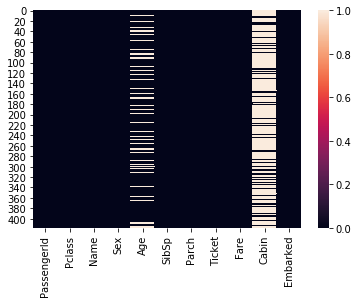

In [27]:
sns.heatmap(test.isnull())

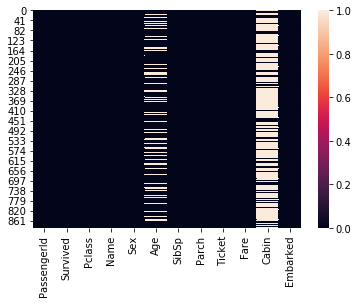

In [28]:
sns.heatmap(train.isnull())

In [29]:
train.Age.fillna(value=train.Age.mean(),inplace=True)
test.Age.fillna(value=test.Age.mean(),inplace=True)
train.Embarked.fillna(train.Embarked.value_counts().index[0],inplace=True)
test.Fare.fillna(test.Fare.isna().any(),inplace=True)
assert train.Survived.isin([0,1]).all()
assert train.Pclass.isin([1,2,3]).all()
assert test.Pclass.isin([1,2,3]).all()
assert train.Sex.isin(['male','female']).all()
assert test.Sex.isin(['male','female']).all()
assert train.Embarked.isin(['S','C','Q']).all()
assert test.Embarked.isin(['S','C','Q']).all()
assert train.Age.notnull().all()
assert test.Age.notnull().all()

In [30]:
def plot(x):
    survived=train[train.Survived==1][x].value_counts()
    dead=train[train.Survived==0][x].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True)

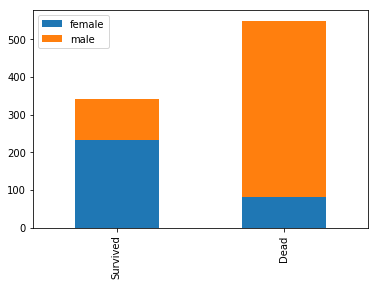

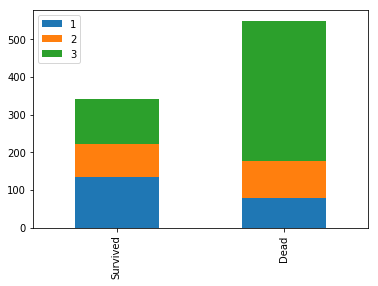

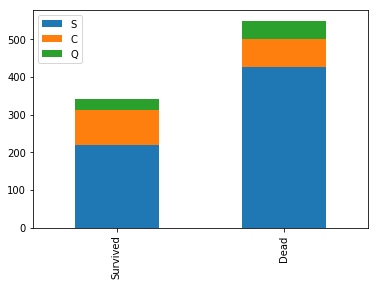

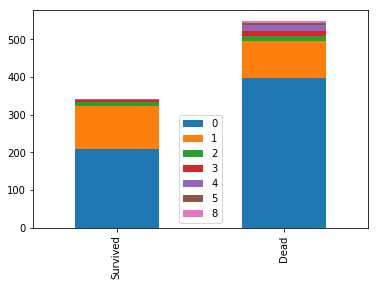

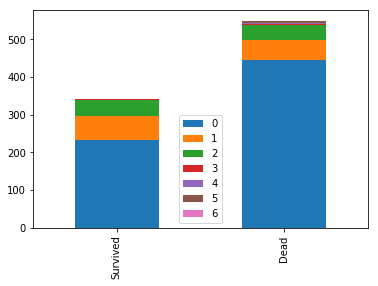

In [31]:
plot("Sex")
plot("Pclass")
plot("Embarked")
plot("SibSp")
plot("Parch")

In [32]:
train['Title']=train["Name"].str.split(", ",expand=True)[1].str.split(". ",expand=True)[0]
test['Title']=test["Name"].str.split(", ",expand=True)[1].str.split(". ",expand=True)[0]
min_titles=(train.Title.value_counts()<10)
train['Title']=train['Title'].apply(lambda x: 'Misc' if min_titles.loc[x]==True else x)
min_titles=(test.Title.value_counts()<10)
test['Title']=test['Title'].apply(lambda x: 'Misc' if min_titles.loc[x]==True else x)
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

In [22]:
train.columns,test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize'],
       dtype='object'))

In [33]:
train.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
test.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
train = pd.get_dummies(train, columns = ["Sex", "Embarked", "Title"])
test=pd.get_dummies(test,columns=['Sex','Embarked','Title'])

In [41]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.drop("PassengerId", axis=1,inplace=True)
X_train.shape, y_train.shape, X_test.shape
X_train.columns,X_test.columns

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_female',
        'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
        'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
       dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_female',
        'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
        'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
       dtype='object'))

In [42]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
gbc=GradientBoostingClassifier()
gb=gbc.fit(X_train,y_train)
y_predicted_gb=gb.predict(X_test)
acc_gbc = round(gbc.score(X_train, y_train) * 100, 2)
acc_gbc

90.8

In [48]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_predicted_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.43

In [51]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_predicted_dt
    })
submission.to_csv(r'C:\Users\vivek\Desktop\ml\submission.csv', index=False)